In [2]:
import numpy as np , pandas as pd,matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.datasets import make_classification


In [3]:
from sklearn.model_selection import train_test_split
X, y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [4]:
X.shape

(2000, 20)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
ytrain_pred=rf_model.predict_proba(X_train)
print("RF train roc-auc: {}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9815722222222222


## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train,y_train)
ytrain_pred=log_classifier.predict_proba(X_train)
print('logistic train roc-auc:{}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

logistic train roc-auc:0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


## Ada Boosting

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train,y_train)
ytrain_pred=ada_classifier.predict_proba(X_train)
print('Adaboos train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboos train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


## KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


### Selecting the best threshold for maximum accuracy

In [17]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9851555555555556


In [18]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.95,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.95,0.966929,0.538202,0.8
3,0.97,0.761539,0.509875,0.8
4,0.63,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,0.98,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [19]:
final_prediction

0      0.875262
1      0.118323
2      0.813783
3      0.760353
4      0.574947
         ...   
595    0.121340
596    0.117845
597    0.874197
598    0.163217
599    0.834857
Length: 600, dtype: float64

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds


array([1.91188114, 0.91188114, 0.90482118, 0.90327475, 0.80556516,
       0.8055558 , 0.79475303, 0.79412833, 0.79377646, 0.79321156,
       0.76035339, 0.75787124, 0.72701656, 0.72637362, 0.70249037,
       0.70143711, 0.67647732, 0.66243537, 0.6115152 , 0.60175354,
       0.59827749, 0.59614346, 0.58745356, 0.57639283, 0.55105932,
       0.52877948, 0.52615858, 0.49116892, 0.45490225, 0.44472765,
       0.4396034 , 0.42091982, 0.41129719, 0.34807343, 0.34336612,
       0.24083728, 0.23896893, 0.23098126, 0.22640421, 0.21213088,
       0.20848417, 0.12359215, 0.1228351 , 0.10548439])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in thresholds:
    y_pred=np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
accuracy_ls=pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns=['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy_ls.head()

,thresholds,accuracy
29,0.444728,0.961667
30,0.439603,0.960000
28,0.454902,0.960000
31,0.420920,0.958333
27,0.491169,0.958333


In [24]:
accuracy_ls

,thresholds,accuracy
29,0.444728,0.961667
30,0.439603,0.960000
28,0.454902,0.960000
31,0.420920,0.958333
27,0.491169,0.958333
25,0.528779,0.958333
24,0.551059,0.958333
32,0.411297,0.956667
26,0.526159,0.956667
22,0.587454,0.948333


In [30]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

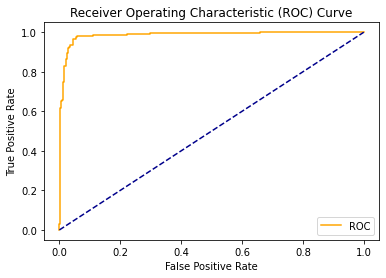

In [31]:
plot_roc_curve(fpr,tpr)